# Introduction to Machine Learning (CSCI-UA.473)

### Homework 1: Linear Models
#### Due: October 2nd, 2023 at 11:59PM


#### Name: Gil Halevi
#### Email: gh2354@nyu.edu

### Z Disease Dataset

The Z dataset contains ten baseline variables (age, sex, BMI, average blood pressure, and six blood serum measurements) and a quantitative measure of disease progression one year after baseline. Specifically, it comprises a total of 442 samples, where each sample has 10 input features and a target value representing the quantitative measure of disease Z progression.

In [ ]:
import pandas as pd
import numpy as np
import torch
# from google.colab import drive
# drive.mount('/content/drive')

# Load the entire dataset from the CSV file
data = pd.read_csv('FML2023_HW1_Dataset.csv')

# Separate the features, target values, and feature names
X = data.drop('target', axis=1)
y = torch.as_tensor(data['target'],dtype=torch.double)
feature_names = X.columns.tolist()
X=torch.as_tensor(X.values,dtype=torch.double)

Mounted at /content/drive


In [ ]:
print(feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


### Question 1: Data Visualization (15 points)
**Task 1.1 (5 points):** Create a scatter plot to visualize the relationship between BMI (Body Mass Index) and disease Z progression.

* Analyze the scatter plot and describe whether there appears to be a positive or negative correlation, or if no clear correlation is evident.
* Can we confidently infer a person's disease Z status using BMI as the only input variable? Explain your reasoning and any potential caveats.

<Axes: xlabel='bmi', ylabel='target'>

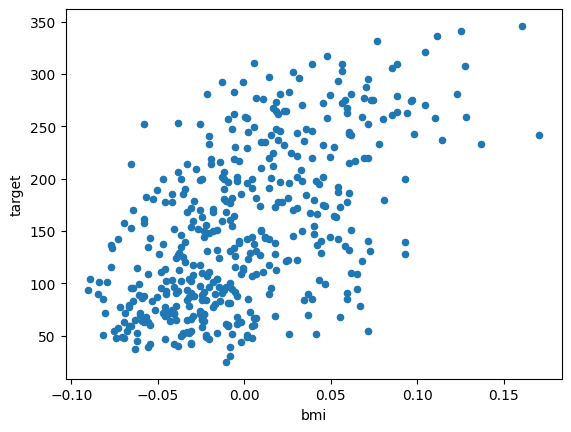

In [ ]:
data.plot.scatter(x='bmi', y='target')

In my opinion, the residuals are too high for us to confidently infer disease progression using bmi. At a bmi of 0.00, for example, many patients are around 50, while many other patients are at around 300. bmi provides some information about disease status, but not that much

**Task 1.2 (5 points):** Create a histogram to visualize the distribution of age among Z patients.

* Does the histogram reveal any noticeable peaks, clusters, or trends?

array([[<Axes: title={'center': 'target'}>]], dtype=object)

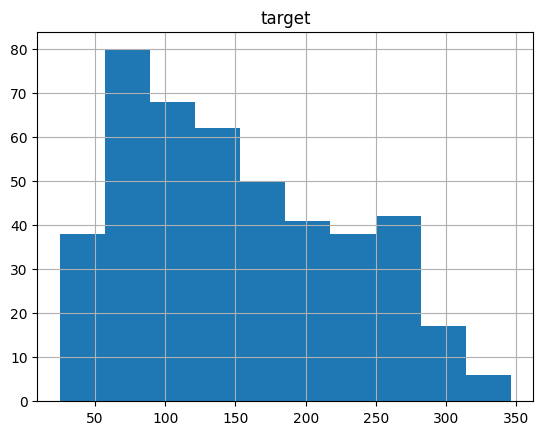

In [ ]:
data.hist(column='target')

This histogram shows a peak between 50 and 100 follows by a long linear decline up to 350.

**Task 1.3 (5 points):** The box plot is a graphical representation that allows you to visually assess the distribution of values and identify potential differences between the two groups. If you're unfamiliar with box plots or need further guidance, you can refer to this [resource](https://www.data-to-viz.com/caveat/boxplot.html) on box plots for a detailed explanation and examples.

Construct a box plot to compare the progression of Z in male and female patients. How does the progression differ between males and females, as revealed by the box plot?

<Axes: title={'center': 'target'}, xlabel='sex'>

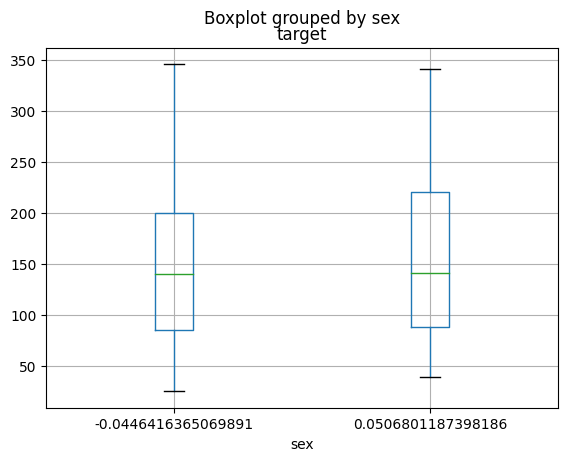

In [ ]:
data.boxplot(column='target',by='sex')

The patients whose sex is coded as positive (not sure if that's male or female) have slightly higher disease progression than those coded as negative. The positive-coded patients also had a longer right tail, so they were more likely to have disease progression significantly above median (at least, this is what it seems like from the 3/4 percentile data).

### Question 2: Linear, Ridge, and Lasso Regression (8 points)

**Task 2.1 (2 points):** Split the dataset into training and testing sets (80/20\%) split.

In [ ]:
from sqlalchemy.sql.expression import true
# Add code here
import torch
from torch.utils.data import Dataset, DataLoader, random_split

class zDataset(Dataset):
  def __init__(self, xs, ys):
    self.n_samples = xs.shape[0]
    self.xs = xs
    self.ys = ys
  def __getitem__(self, i):
    return self.xs[i],self.ys[i]
  def __len__(self):
    return self.n_samples

ZTrainSet, ZTestSet = random_split(zDataset(X,y), (0.8,0.2))

**Task 2.2 (2 points):** Linear regression

A linear regression model is a linear function of the parameters of the model. Its output $y$ is a real number or a real vector, depending on the task definition. That is:
$$\beta = \underset{\beta}{\text{argmin}}\sum_{i=1}^n\left(Y_i - X_i \beta\right)^2$$


* $X_i = [X_1^{(1)}\ldots X_i^{(p)}]$
* $\beta_0,\ldots,\beta_p$ are the coefficients for the features.
* $x_{ji}$ represents the values of the j-th feature for the i-th observation.
* $y_i$ is the target value for the i-th observation.

In [ ]:
def linear_train(trainSet, epochs, lr, batch):
  model = torch.nn.Linear(10,1, dtype=torch.double)
  optim=torch.optim.SGD(params = model.parameters(),lr=lr)
  loss_fn = torch.nn.MSELoss(reduction='mean')
  for epoch in range(epochs):
    data=DataLoader(trainSet,batch_size=batch,shuffle=True)
    for inpt,target in data:
      optim.zero_grad()
      outpt = model(inpt)
      target.unsqueeze_(1)
      loss = loss_fn(outpt,target)
      loss.backward()
      optim.step()
  return model


linear_model = linear_train(ZTrainSet,100,0.001,16)
linear_beta = linear_model.weight
linear_bias = linear_model.bias


**Task 2.3 (2 points) :** Ridge Regression is a regularized linear regression with an added L2 regularization term to the linear regression cost function.

$$\beta = \underset{\beta}{\text{argmin}}\sum_{i=1}^n\left(Y_i - X_i \beta\right)^2 + \lambda \|\beta\|^2_2$$

* $\lambda$ is the regularization hyper-parameter.

In [ ]:
# Add code for ridge regression, you can use machine learning libraries.
def ridge_train(trainSet, epochs, lr, batch, reg_weight):
  model = torch.nn.Linear(10,1, dtype=torch.double)
  optim=torch.optim.SGD(params = model.parameters(),lr=lr)
  loss_fn = torch.nn.MSELoss(reduction='mean')
  for epoch in range(epochs):
    data=DataLoader(trainSet,batch_size=batch,shuffle=True)
    for inpt,target in data:
      optim.zero_grad()
      # inpt = inpt.float()
      outpt = model(inpt)
      target.unsqueeze_(1)
      loss = loss_fn(outpt,target)
      loss += reg_weight*torch.sum(torch.square(model.weight))
      loss += reg_weight*torch.square(model.bias[0])
      loss.backward()
      optim.step()
    losses.append(sum(losses_curr))
  return model

ridge_model = ridge_train(ZTrainSet,100,0.001,16,1)

ridge_beta = ridge_model.weight
ridge_bias = ridge_model.bias

[tensor(642844.0639, dtype=torch.float64), tensor(584973.3269, dtype=torch.float64), tensor(571623.4605, dtype=torch.float64), tensor(550404.0335, dtype=torch.float64), tensor(507129.7343, dtype=torch.float64), tensor(496086.5448, dtype=torch.float64), tensor(495922.1163, dtype=torch.float64), tensor(480131.1695, dtype=torch.float64), tensor(451916.7872, dtype=torch.float64), tensor(439711.7481, dtype=torch.float64), tensor(449484.9346, dtype=torch.float64), tensor(418206.0502, dtype=torch.float64), tensor(423555.5450, dtype=torch.float64), tensor(409522.6104, dtype=torch.float64), tensor(408056.6303, dtype=torch.float64), tensor(403286.4283, dtype=torch.float64), tensor(424662.4108, dtype=torch.float64), tensor(398438.3908, dtype=torch.float64), tensor(411615.6290, dtype=torch.float64), tensor(401239.0652, dtype=torch.float64), tensor(394969.0897, dtype=torch.float64), tensor(395119.3732, dtype=torch.float64), tensor(406363.6470, dtype=torch.float64), tensor(394544.8264, dtype=torch.f

Text(0, 0.5, 'Loss')

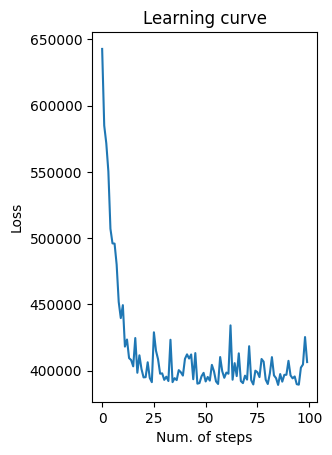

In [ ]:
print(losses)
plt.subplot(1, 2, 1)
plt.plot(range(100), torch.stack(losses).detach())
plt.title('Learning curve')
plt.xlabel('Num. of steps')
plt.ylabel('Loss')

**Task 2.4 (2 points):** Lasso Regression is a regularized linear regression with an added L1 regularization term to the linear regression cost function.

$$\beta = \underset{\beta}{\text{argmin}}\sum_{i=1}^n\left(Y_i - X_i \beta\right)^2 + \lambda |\beta|$$

In [ ]:
# Add code for ridge regression, you can use machine learning libraries.
def lasso_train(trainSet, epochs, lr, batch, reg_weight):
  model = torch.nn.Linear(10,1, dtype=torch.double)
  optim=torch.optim.SGD(params = model.parameters(),lr=lr)
  loss_fn = torch.nn.MSELoss(reduction='mean')
  for epoch in range(epochs):
    data=DataLoader(trainSet,batch_size=batch,shuffle=True)
    for inpt,target in data:
      optim.zero_grad()
      outpt = model(inpt)
      target.unsqueeze_(1)
      loss = loss_fn(outpt,target)
      loss += reg_weight*torch.sum(torch.abs(model.weight))
      loss += reg_weight*torch.abs(model.bias[0])
      loss.backward()
      optim.step()
  return model
lasso_model = lasso_train(ZTrainSet,100,0.001,16,1)

lasso_beta = lasso_model.weight
lasso_bias = lasso_model.bias


### Question 3: Model Analysis (15 points)

In [ ]:
## Add code here
print(linear_beta)
print(ridge_beta)
print(lasso_beta)


Parameter containing:
tensor([[ 19.5895,  -0.6160,  86.6772,  59.9500,  27.6515,  21.8888, -57.2985,
          63.5464,  82.9429,  51.2303]], dtype=torch.float64,
       requires_grad=True)
Parameter containing:
tensor([[ 0.6279,  0.1562,  2.1597,  1.6074,  0.7740,  0.6160, -1.4383,  1.6237,
          2.1260,  1.3430]], dtype=torch.float64, requires_grad=True)
Parameter containing:
tensor([[-0.4408,  0.5236,  0.2362, -0.5636, -0.4421, -0.3213, -0.4236,  0.4961,
         -0.7689,  0.1339]], dtype=torch.float64, requires_grad=True)


**Task 3.1 (5 points):** Visualize the coefficients of the Linear, Ridge, and Lasso models.
- What will be the impact of increase in the strength of s1 in linear regression?
- Among the three models, which one exhibits a more pronounced reliance on the BMI feature?

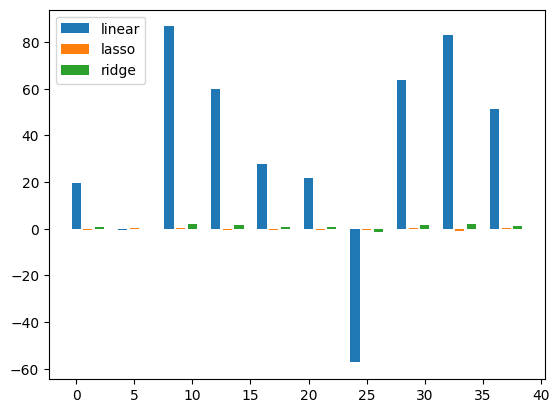

In [ ]:
import matplotlib.pyplot as plt
linear_beta_np = linear_beta.detach().numpy()[0]
lasso_beta_np = lasso_beta.detach().numpy()[0]
ridge_beta_np = ridge_beta.detach().numpy()[0]
plt.bar([4*i for i in range(10)],linear_beta_np, label="linear")
plt.bar([4*i+1 for i in range(10)],lasso_beta_np, label="lasso")
plt.bar([4*i+2 for i in range(10)],ridge_beta_np,label="ridge")
plt.legend()


An increase in the strength of s1 in linear regression will cause an increase in the expected target, at a rate of increase of 36 for every increase of 1 in s1

As for reliance on bmi, tt depends. Linear regression has the highest absolute increase in the target for increase in bmi (123). However, in lasso regression, the ratio between the model's coefficient of bmi and other coefficients seems to be highest

**Task 3.2 (5 points):** Cross-validation involves dividing the available data into multiple subsets or folds to ensure that the model is evaluated on different parts of the data. This helps in obtaining a more accurate estimate of how the model would perform on unseen data. Compare the cross validation scores between Linear, Ridge, and Lasso regression models using a bar plot.

In [ ]:
def test_model(model,testSet):
  losses=[]
  loss = torch.nn.MSELoss(reduction='mean')
  with torch.no_grad():
    for (input,target) in DataLoader(testSet):
      output = model(input)
      target=target.unsqueeze(0)
      cur_loss = loss(target,output)
      # print(cur_loss)
      losses.append(cur_loss)
    return (sum(losses)/len(losses)).item()
print(test_model(linear_model,ZTestSet))
print(test_model(ridge_model,ZTestSet))
print(test_model(lasso_model,ZTestSet))


4770.537772184662
12195.600370989217
8561.24280607101


In [ ]:
from torch.utils.data.dataset import ConcatDataset
## Add code here


linear_losses = []
ridge_losses = []
lasso_losses = []


folds = random_split(zDataset(X,y), [0.2 for i in range(5)])
for i in range(5):
  trainSet = ConcatDataset([folds[j] for j in range(i)] + [folds[j] for j in range(i+1,5)])
  testSet = folds[i]
  linear_model = linear_train(trainSet,100,0.001,16)
  ridge_model = ridge_train(trainSet,100,0.001,16,10)
  lasso_model = lasso_train(trainSet,100,0.001,16,10)


  linear_losses.append(test_model(linear_model,testSet))
  ridge_losses.append(test_model(ridge_model,testSet))
  lasso_losses.append(test_model(lasso_model,testSet))
losses=np.array([sum(linear_losses)/5,sum(ridge_losses)/5,sum(lasso_losses)/5])
print(losses)

[4744.40446654 5869.70140139 6001.93705367]


**Task 3.3 (5 points):** Conduct a grid search for both Lasso and Ridge regression models, and then visualize the differences in results obtained before and after the grid search using a bar plot.
- What are the obtained regularization strength parameters for both models?
- Did the grid search improve model performance?

For both models, I found the optimal

In [ ]:
## Add code here
ridge_losses = []
lasso_losses = []
for reg_weight in [0.0001,0.001,0.01,0.03,0.1,0.3,1,3,10,30,100,300]:
  ridge_losses.append((reg_weight,test_model(ridge_train(ZTrainSet,100,0.01,16,reg_weight),ZTestSet)))
  lasso_losses.append((reg_weight,test_model(lasso_train(ZTrainSet,100,0.01,16,reg_weight),ZTestSet)))

In [ ]:
print(ridge_losses)
print(lasso_losses)

[(0.0001, 4750.620393604081), (0.001, 4782.898834784755), (0.01, 4962.707609412454), (0.03, 5308.4178860357715), (0.1, 5973.687610027811), (0.3, 7317.609584932437), (1, 12322.183131259888), (3, 19993.89162290518), (10, 25903.361584203376), (30, 28497.887325543947), (100, 2.243185698405812e+40), (300, nan)]
[(0.0001, 4772.798156642287), (0.001, 4760.3378696358295), (0.01, 4755.354312102578), (0.03, 4753.68552842643), (0.1, 4792.187147918906), (0.3, 4845.219313045885), (1, 5102.069697818691), (3, 5776.027285072178), (10, 6086.5999510038955), (30, 6304.9749196200955), (100, 8936.704610050338), (300, 28750.04154033313)]


For both models, I found the optimal solution to be lowering the regularization weight as much as possible. The grid search helped.

### Question 4: Bias and Variance Tradeoff (12 points)

**Task 4.1 (5 points)** Describe the bias-variance tradeoff, how it affects model performance, and explain the relationship between model complexity and bias/variance. Use markdown cells for explanation.

**Task 4.2 (7 points):** Consider the Z dataset with input features X and target values y. Introduce polynomial features with degrees 1 to 8 to transform the input features into higher-degree polynomials.

To demonstrate the bias-variance tradeoff, fit regression models of to the transformed dataset. Then, create line plots where the x-axis represents the polynomial degrees, and the y-axis represents the Mean Squared Error (MSE) for both the training and testing datasets. Compare the errors between these models.


Squared error between a hypothesis $f_D$ decomposes into a bias term and a variance term:

$$E_{(x,y);D}[(f_D(x)-y)^2]$$
$$=E_{(x,y);D}[f_D(x)^2 - 2yf_D(x) + y^2]$$
since we assume y=f(x)+$\epsilon$, where f(x) is the ideal function, for $\epsilon \sim  N(0,\sigma)$:
$$=E_{(x,\epsilon);D}[f_D(x)^2 - 2(f(x)+\epsilon)f_D(x) + (f(x)+\epsilon)^2]$$
$$=E_{(x,\epsilon);D}[f_D(x)^2 - 2f(x)f_D(x)+2\epsilon f(x) + f(x)+2\epsilon f(x) + \epsilon^2]$$
$$=E_{(x,\epsilon);D}[f_D(x)^2 - 2f(x)f_D(x)+ f(x)+ \epsilon^2]$$
$$=E_{(x,\epsilon);D}[(f_D(x)^2 - E[f_D(x)]^2) + (E[f_D(x)]^2 - 2f(x)f_D(x)+ f(x)^2)+ \epsilon^2]$$
$$=E_{(x,\epsilon);D}[(f_D(x)^2 - E[f_D(x)]^2) + (E[f_D(x)] - f(x))^2+ \epsilon^2]$$
= variance + bias$^2$ + $\sigma^2$

If a model is more complex, there will be less bias but it will be more sensitive to the chosen sample D and thus more variance

In [ ]:
### Add code here
class polynomialModel(torch.nn.Module):
  def __init__(self, in_features,out_features,degree):
    super().__init__()
    self.degree=degree
    self.linear_models=torch.nn.ModuleList([torch.nn.Linear(in_features,out_features, dtype=torch.double) for i in range(degree)])
  def forward(self, x):
    out=[]
    for i in range(self.degree):
      out.append(self.linear_models[i](x.pow(i)))
    return torch.sum(torch.stack(out,0),0)
def poly_train(trainSet, epochs, lr, batch,degree):
  poly_model = polynomialModel(10,1,degree)
  optim=torch.optim.SGD(params = poly_model.parameters(),lr=lr)
  loss_fn = torch.nn.MSELoss(reduction='mean')
  for epoch in range(epochs):
    data=DataLoader(trainSet,batch_size=batch,shuffle=True)
    for inpt,target in data:
      optim.zero_grad()
      outpt = poly_model(inpt)
      target.unsqueeze_(1)
      loss = loss_fn(outpt,target)
      loss.backward()
      optim.step()
  return poly_model

test_losses=[]
train_losses=[]
for i in range(1,9):
  model = poly_train(ZTrainSet,100,0.01,16,i)
  test_losses.append(test_model(model, ZTestSet))
  train_losses.append(test_model(model, ZTrainSet))





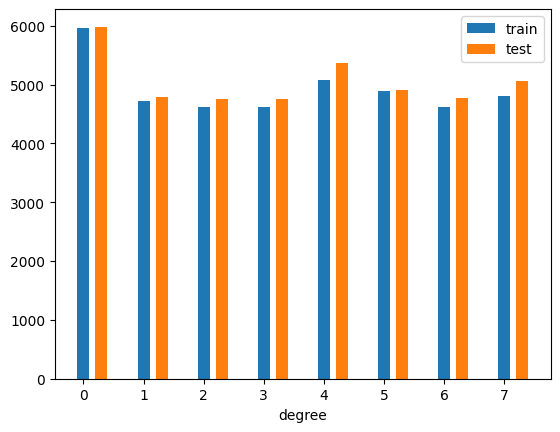

In [ ]:

plt.bar([i for i in range(8)],train_losses, label="train", width=0.2)
plt.bar([i+0.3 for i in range(8)],test_losses, label="test",width=0.2)
plt.xlabel("degree")
plt.legend()

#### Z dataset (Classification)

For the last question, we will create a classification version of the Z dataset as follows:

Class 0: Denotes Z progression values that fall below the 50th percentile of the original target variable.

Class 1: Denotes Z progression values that surpass the 50th percentile of the original target variable.

In [ ]:
import sklearn
# Shuffle the data
X, y = sklearn.utils.shuffle(X, y, random_state=42)

# Create the target variable
y = np.where(y > np.percentile(y, 50), 1, 0)

### Question 5: Logistic Regression from Scratch (20 points)


**Task 5.1 (2 points):** Implement the sigmoid function.    
**Task 5.2 (7 points):** Initialize the weights and biases to zeros and implement gradient descent.   
**Task 5.3 (6 points):** Implement the predict and predict_proba functions:
  - predict returns a single discrete category corresponding to the class that has been predicted.
  - predict_proba returns continuous values that represent the likelihood of each input belonging to each class.

In [ ]:
import numpy as np
import torch

class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None

    def _sigmoid(self, z):
        return 1/(1+np.exp(-z))
    # outputs the graduent of the loss
    # x and z are vectors; z is a scalar
    def _loss_derv(self, z,x,y):
        return -(y*(1-self._sigmoid(np.dot(z,x))) + (1-y)*(self._sigmoid(np.dot(z,x))))*x

    def fit(self, X, y):
        X = np.concatenate((np.ones((X.shape[0],1)),X),axis=1)
        self.weights = np.zeros((X.shape[1])) # combined weights and bias into one
        # Gradient descent
        grad=0
        batch_size = 16
        for i in range(self.num_iterations):
          i%=X.shape[0]
          grad += self._loss_derv(self.weights,X[i],y[i])
          if (i%batch_size ==0):
            self.weights-=grad
            grad=0

    def predict(self, X):
        return (self.predict_proba(X)>0.5).astype(int)

    def predict_proba(self, X):
      X = np.concatenate((np.ones((X.shape[0],1)),X),axis=1)
      out = np.matmul(X,self.weights)
      return self._sigmoid(out)

    def get_params(self, deep=True):
        return {
            "learning_rate": self.learning_rate,
            "num_iterations": self.num_iterations
        }

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

In [ ]:
x=np.array([0.,0.3,0.7])
x=x>0.5
print(x)

[False False  True]


**Task 5.4 (5 points):** Create an instance of a LogisticRegressionScratch model and train it using a new (80/20%) split of the classification dataset. Afterwards, calculate the accuracy, precision, recall, and F1 score (you can use available machine learning libraries).

In [ ]:
### Add code here
import sklearn
import sklearn.metrics as metrics
ZTrainSet2, ZTestSet2 = random_split(zDataset(X,y), (0.8,0.2))
train_tensor_X = np.stack([x.detach().numpy().squeeze() for (x,y) in DataLoader(ZTrainSet2)])
train_tensor_y = np.stack([y.detach().numpy().squeeze() for (x,y) in DataLoader(ZTrainSet2)])

test_tensor_X = np.stack([x.detach().numpy().squeeze() for (x,y) in DataLoader(ZTestSet2)])
test_tensor_y = np.stack([y.detach().numpy().squeeze() for (x,y) in DataLoader(ZTestSet2)])
model = LogisticRegressionScratch()
model.fit(train_tensor_X,train_tensor_y)
predictions=model.predict(test_tensor_X)

print("precision:"+str(metrics.average_precision_score(test_tensor_y,predictions)))
print("recall:"+str(metrics.recall_score(test_tensor_y,predictions)))
print("accuracy:"+str(metrics.accuracy_score(test_tensor_y,predictions)))
print("f1 score:"+str(metrics.f1_score(test_tensor_y,predictions)))

precision:0.5227272727272727
recall:1.0
accuracy:0.5227272727272727
f1 score:0.6865671641791045
